In [13]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [14]:
데이터_일자별 = pd.read_csv("D:/College Project/3학년 2학기/참빛설계/데이터/내국인(블록)_일자별시간대별.csv", encoding="utf-8")

In [15]:
데이터_업종 = pd.read_csv("D:/College Project/3학년 2학기/참빛설계/데이터/신한카드_내국인_63업종_코드.csv", encoding="utf-8")

In [16]:
데이터_업종['SB_UPJONG_CD(내국인업종코드)'] = 데이터_업종['SB_UPJONG_CD(내국인업종코드)'].str.upper()

In [17]:
데이터_업종.head()

,SB_L_UPJONG_NM(대분류_13분류),SB_M_UPJONG_NM(중분류_30분류),SB_UPJONG_NM(소분류_63분류),SB_UPJONG_CD(내국인업종코드)
0,요식/유흥,한식,한식,SB001
1,요식/유흥,일식/중식/양식,일식,SB002
2,요식/유흥,일식/중식/양식,양식,SB003
3,요식/유흥,일식/중식/양식,중식,SB004
4,요식/유흥,제과/커피/패스트푸드,제과점,SB005


In [18]:
데이터_일자별 = pd.merge(데이터_일자별, 데이터_업종, how = 'left', on = 'SB_UPJONG_CD(내국인업종코드)')
데이터_일자별.head()

,BLCK_CD(가맹점블록코드),SB_UPJONG_CD(내국인업종코드),TS_YM(기준년월),TS_YMD(일별),DAW(요일),TM(시간대),AMT_CORR(카드이용금액계),USECT_CORR(카드이용건수),SB_L_UPJONG_NM(대분류_13분류),SB_M_UPJONG_NM(중분류_30분류),SB_UPJONG_NM(소분류_63분류)
0,223689,SB008,201812,20181201,토요일,11,9999,9999.999,요식/유흥,기타요식,기타요식
1,223689,SB008,201812,20181201,토요일,14,9999,9999.999,요식/유흥,기타요식,기타요식
2,223689,SB008,201812,20181201,토요일,15,9999,9999.999,요식/유흥,기타요식,기타요식
3,223689,SB008,201812,20181201,토요일,16,9999,9999.999,요식/유흥,기타요식,기타요식
4,223689,SB008,201812,20181201,토요일,19,9999,9999.999,요식/유흥,기타요식,기타요식


In [20]:
일자별 = 데이터_일자별.pivot_table(index=['DAW(요일)','TM(시간대)'], values=['AMT_CORR(카드이용금액계)', 'USECT_CORR(카드이용건수)'],aggfunc='sum')
일자별

AMT_CORR(카드이용금액계)  USECT_CORR(카드이용건수)
DAW(요일) TM(시간대)                                       
금요일     0                   139986          139999.986
        1                   109989          109999.989
        2                    99990           99999.990
        3                    89991           89999.991
        4                    79992           79999.992
...                            ...                 ...
화요일     19                  349965          349999.965
        20                  329967          329999.967
        21                  279972          279999.972
        22                  249975          249999.975
        23                  159984          159999.984

[168 rows x 2 columns]

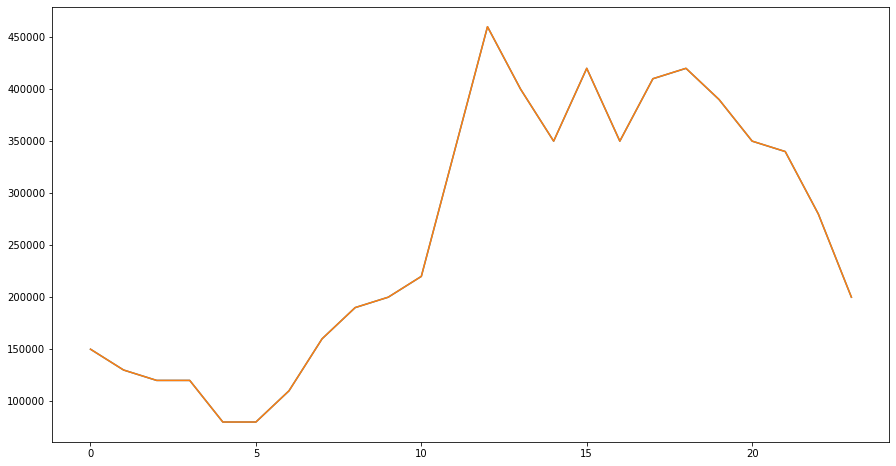

In [21]:
plt.figure(figsize = (15,8))
plt.plot(일자별.xs('월요일',axis=0))

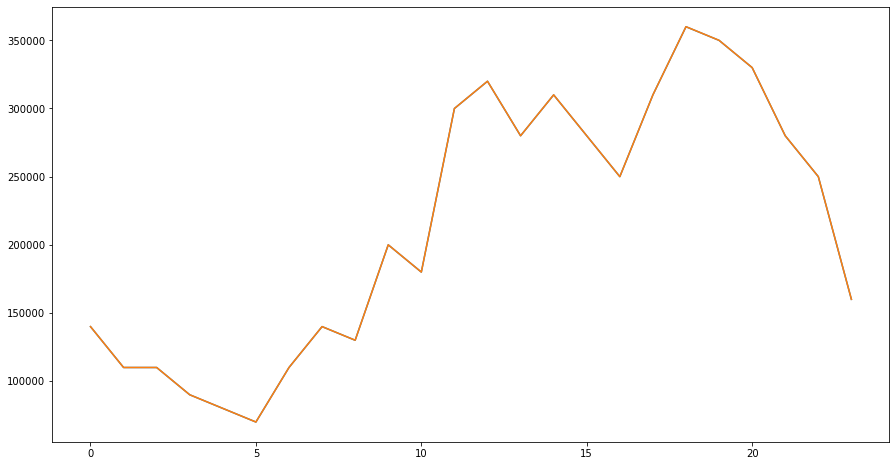

In [22]:
plt.figure(figsize = (15,8))
plt.plot(일자별.xs('화요일',axis=0))

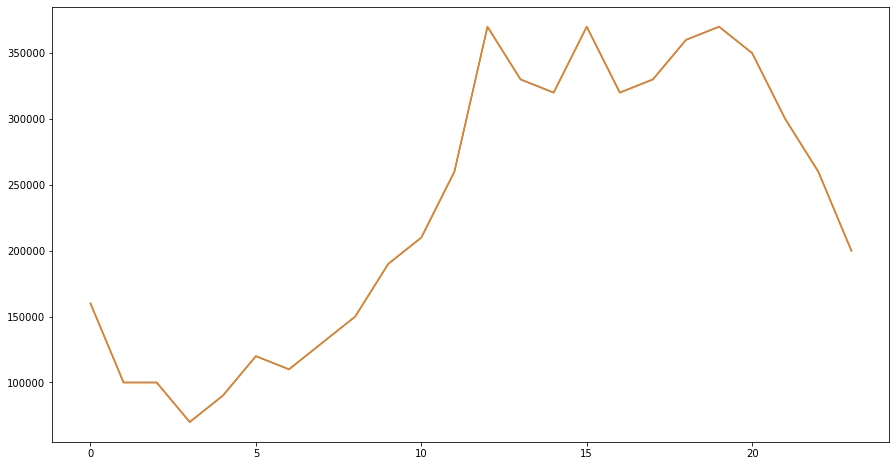

In [23]:
plt.figure(figsize = (15,8))
plt.plot(일자별.xs('수요일',axis=0))

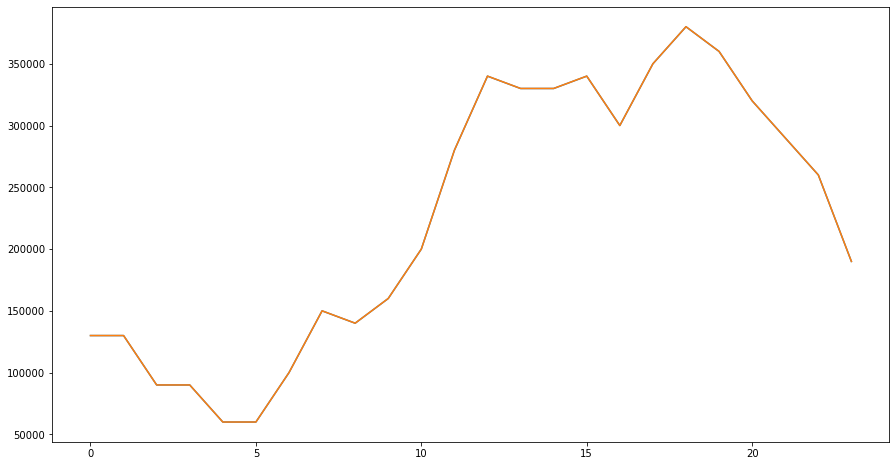

In [24]:
plt.figure(figsize = (15,8))
plt.plot(일자별.xs('목요일',axis=0))

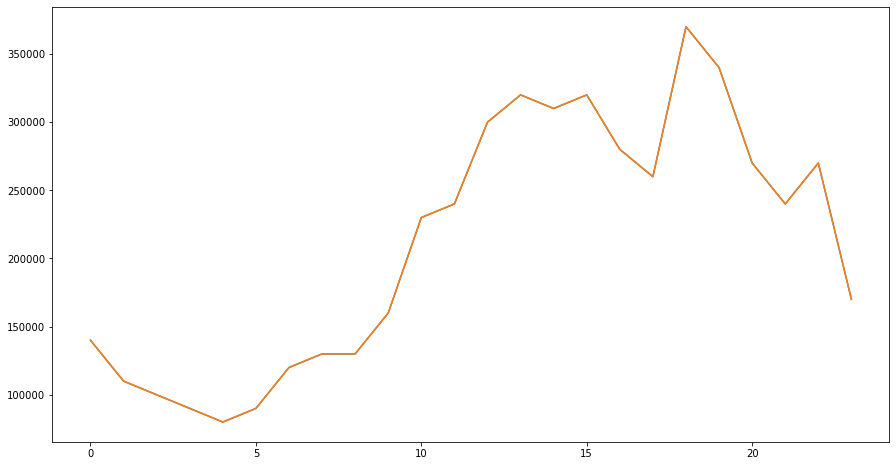

In [25]:
plt.figure(figsize = (15,8))
plt.plot(일자별.xs('금요일',axis=0))

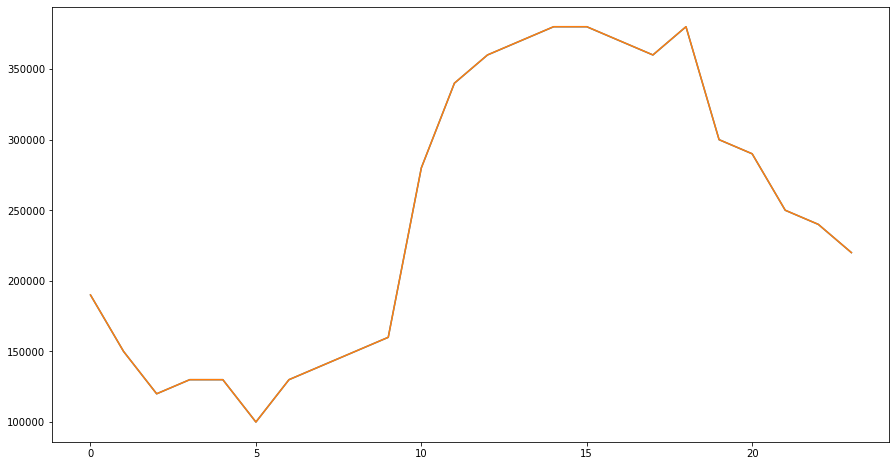

In [26]:
plt.figure(figsize = (15,8))
plt.plot(일자별.xs('토요일',axis=0))

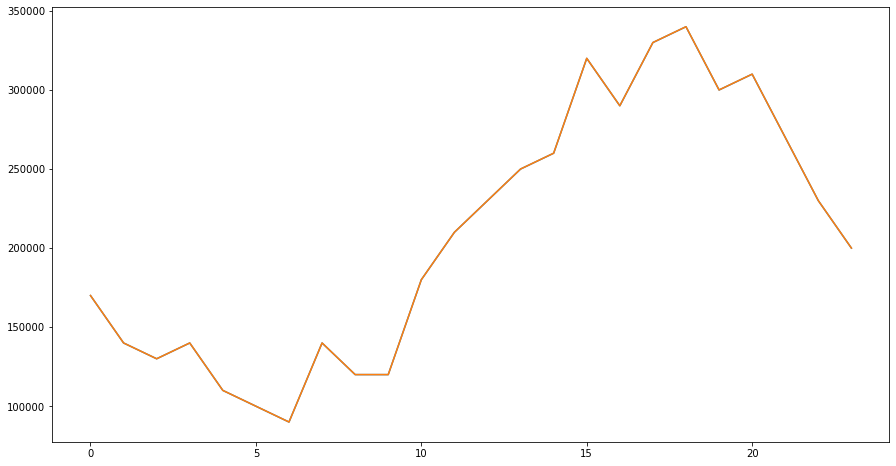

In [27]:
plt.figure(figsize = (15,8))
plt.plot(일자별.xs('일요일',axis=0))

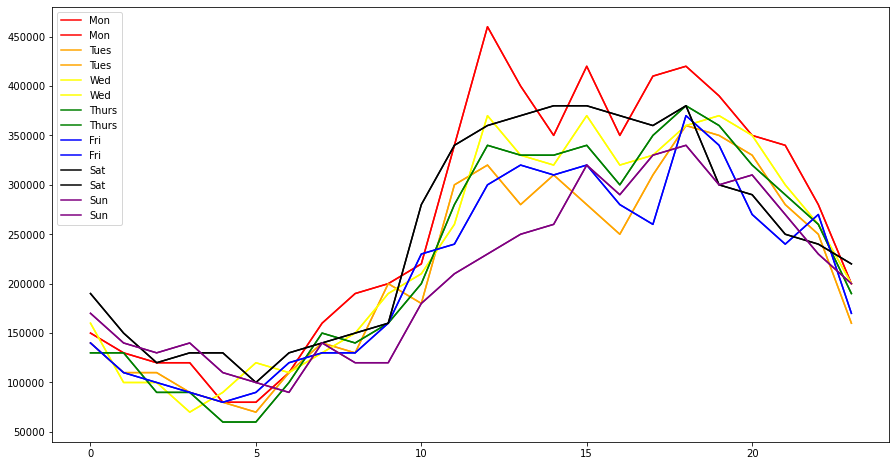

In [59]:
plt.figure(figsize = (15,8))

plt.plot(일자별.xs('월요일',axis=0), color = 'red', label = 'Mon')
plt.plot(일자별.xs('화요일',axis=0), color = 'orange', label = 'Tues')
plt.plot(일자별.xs('수요일',axis=0), color = 'yellow', label = 'Wed')
plt.plot(일자별.xs('목요일',axis=0), color = 'green', label = 'Thurs')
plt.plot(일자별.xs('금요일',axis=0), color = 'blue', label = 'Fri')
plt.plot(일자별.xs('토요일',axis=0), color = 'black', label = 'Sat')
plt.plot(일자별.xs('일요일',axis=0), color = 'purple', label = 'Sun')
plt.legend()
plt.show()